In [2]:
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving taylor_swift_lyrics.csv to taylor_swift_lyrics.csv


In [4]:
df = pd.read_csv('taylor_swift_lyrics.csv',encoding = 'latin-1')
df.head()

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


In [5]:
songs = df.groupby('track_title').agg({'lyric':lambda x:" ".join(x),'year':'mean'}).reset_index()

In [6]:
pd.options.display.max_colwidth = 5000

In [7]:
songs.head()

,track_title,lyric,year
0,...Ready for It?,"Knew he was a killer first time that I saw him Wondered how many girls he had loved and left haunted But if he's a ghost, then I can be a phantom Holdin' him for ransom, some Some boys are tryin' too hard, he don't try at all though Younger than my exes, but he act like such a man, so I see nothing better, I keep him forever Like a vendetta-ta I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night, in my dreams I know I'm gonna be with you So I take my time Are you ready for it? Knew I was a robber first time that he saw me Stealing hearts and running off and never sayin' sorry But if I'm a thief, then he can join the heist, and We'll move to an island, and And he can be my jailer, Burton to this Taylor Every love I've known in comparison is a failure I forget their names now, I'm so very tame now Never be the same now, now I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know (no one has to know) In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night in my dreams I know I'm gonna be with you So I take my time Are you ready for it? Oh, are you ready for it? Baby, let the games begin Let the games begin Let the games begin Baby, let the games begin Let the games begin Let the games begin I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night, in my dreams I know I'm gonna be with you So I take my time In the middle of the night Baby, let the games begin Let the games begin Let the games begin Are you ready for it? Baby, let the games begin Let the games begin Let the games begin Are you ready for it?",2017.0
1,22,"It feels like a perfect night to dress up like hipsters And make fun of our exes, uh uh, uh uh It feels like a perfect night for breakfast at midnight To fall in love with strangers, uh uh, uh uh Yeah We're happy, free, confused, and lonely at the same time It's miserable and magical, oh yeah Tonight's the night when we forget about the deadlines It's time, uh uh I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 It seems like one of those nights This place is too crowded, too many cool kids, uh uh, uh uh (Who's Taylor Swift, anyway? Ew) It seems like one of those nights We ditch the whole scene and end up dreaming Instead of sleeping Yeah We're happy, free, confused, and lonely in the best way It's miserable and magical, oh yeah Tonight's the night when we forget about The heartbreaks, it's time Oh oh I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 I don't know about you 22, 22 It feels like one of those nights We ditch the whole scene It feels like one of those nights We won't be sleeping It feels like one of those nights You look like bad news, I gotta have you I gotta have you I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 Dancing like 22, yeah, 22, yeah yeah It feels like one of those nights We ditch the whole scene It feels like one of those nights We won't be sleeping It feels like one of those nights You look like bad news, I gotta have you I gotta have you",2012.0
2,A Perfectly Good Heart,"Why would you wanna break a perfec

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
import nltk

In [10]:
 nltk.download('stopwords') 
 from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
stop_words.extend(['back','said','come','things','get','oh','one','yeah','place','would','like','know','stay','go','let','cause'])

In [11]:
stop_words = stopwords.words('english')

In [23]:
vectorizer = TfidfVectorizer(stop_words = stop_words, min_df = 0.1 )

In [24]:
tfidf = vectorizer.fit_transform(songs['lyric'])

In [25]:
from sklearn.decomposition import NMF

In [26]:
nmf = NMF(n_components = 6 )

In [27]:
topic_values = nmf.fit_transform(tfidf)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 51.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


In [19]:
import sklearn
print(sklearn.__version__)


1.2.1


In [29]:
for topic_num, topic in enumerate(nmf.components_):
    message = "Topic #{}: ".format(topic_num + 1)
    message += " ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])
    print(message)

Topic #1: love beautiful way never knew waiting feel say see alone
Topic #2: ever never getting remember still want see gonna could old
Topic #3: wanna good first break feeling end way well miss heart
Topic #4: baby time sorry night bad see dancing every dreams tell
Topic #5: think gone dress hope head rain could better best home
Topic #6: girl got home look tell long say want forever trying


In [32]:
topic_labels = ['love','memories','breakups','party','homesick','independence']

In [33]:
df_topics = pd.DataFrame(topic_values,columns = topic_labels)
df_topics

,love,memories,breakups,party,homesick,independence
0,0.044151,0.082448,0.000000,0.435936,0.000000,0.000000
1,0.016880,0.000000,0.080968,0.249976,0.051435,0.000000
2,0.000000,0.000000,0.660302,0.000000,0.000000,0.000000
3,0.000000,0.029624,0.016287,0.000000,0.000000,0.461725
4,0.000000,0.174040,0.078013,0.067745,0.059681,0.148530
...,...,...,...,...,...,...
89,0.018476,0.028296,0.046833,0.225145,0.063317,0.037830
90,0.058273,0.150082,0.000000,0.028247,0.061313,0.239239
91,0.276653,0.000000,0.000000,0.000000,0.008983,0.107216
92,0.010935,0.106797,0.000000,0.316060,0.150588,0.044322


In [34]:
songs = songs.join(df_topics)

In [36]:
songs.head()

,track_title,lyric,year,love,memories,breakups,party,homesick,independence
0,...Ready for It?,"Knew he was a killer first time that I saw him Wondered how many girls he had loved and left haunted But if he's a ghost, then I can be a phantom Holdin' him for ransom, some Some boys are tryin' too hard, he don't try at all though Younger than my exes, but he act like such a man, so I see nothing better, I keep him forever Like a vendetta-ta I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night, in my dreams I know I'm gonna be with you So I take my time Are you ready for it? Knew I was a robber first time that he saw me Stealing hearts and running off and never sayin' sorry But if I'm a thief, then he can join the heist, and We'll move to an island, and And he can be my jailer, Burton to this Taylor Every love I've known in comparison is a failure I forget their names now, I'm so very tame now Never be the same now, now I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know (no one has to know) In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night in my dreams I know I'm gonna be with you So I take my time Are you ready for it? Oh, are you ready for it? Baby, let the games begin Let the games begin Let the games begin Baby, let the games begin Let the games begin Let the games begin I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night, in my dreams I know I'm gonna be with you So I take my time In the middle of the night Baby, let the games begin Let the games begin Let the games begin Are you ready for it? Baby, let the games begin Let the games begin Let the games begin Are you ready for it?",2017.0,0.044151,0.082448,0.000000,0.435936,0.000000,0.000000
1,22,"It feels like a perfect night to dress up like hipsters And make fun of our exes, uh uh, uh uh It feels like a perfect night for breakfast at midnight To fall in love with strangers, uh uh, uh uh Yeah We're happy, free, confused, and lonely at the same time It's miserable and magical, oh yeah Tonight's the night when we forget about the deadlines It's time, uh uh I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 It seems like one of those nights This place is too crowded, too many cool kids, uh uh, uh uh (Who's Taylor Swift, anyway? Ew) It seems like one of those nights We ditch the whole scene and end up dreaming Instead of sleeping Yeah We're happy, free, confused, and lonely in the best way It's miserable and magical, oh yeah Tonight's the night when we forget about The heartbreaks, it's time Oh oh I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 I don't know about you 22, 22 It feels like one of those nights We ditch the whole scene It feels like one of those nights We won't be sleeping It feels like one of those nights You look like bad news, I gotta have you I gotta have you I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 Dancing like 22, yeah, 22, yeah yeah It feels like one of those nights We ditch the whole scene It feels like one of those nights We won't be sleeping It feels like one of those nights You look like bad new

In [37]:
songs.loc[songs['love']>= 0.1,'love'] = 1
songs.loc[songs['memories']>= 0.1,'memories'] = 1
songs.loc[songs['breakups']>= 0.1,'breakups'] = 1
songs.loc[songs['party']>= 0.1,'party'] = 1
songs.loc[songs['homesick']>= 0.1,'homesick'] = 1
songs.loc[songs['independence']>= 0.1,'independence'] = 1

In [39]:
songs.loc[songs['love']<= 0.1,'love'] = 0
songs.loc[songs['memories']<= 0.1,'memories'] = 0
songs.loc[songs['breakups']<= 0.1,'breakups'] = 0
songs.loc[songs['party']<= 0.1,'party'] = 0
songs.loc[songs['homesick']<= 0.1,'homesick'] = 0
songs.loc[songs['independence']<= 0.1,'independence'] = 0

In [38]:
songs.head()

,track_title,lyric,year,love,memories,breakups,party,homesick,independence
0,...Ready for It?,"Knew he was a killer first time that I saw him Wondered how many girls he had loved and left haunted But if he's a ghost, then I can be a phantom Holdin' him for ransom, some Some boys are tryin' too hard, he don't try at all though Younger than my exes, but he act like such a man, so I see nothing better, I keep him forever Like a vendetta-ta I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night, in my dreams I know I'm gonna be with you So I take my time Are you ready for it? Knew I was a robber first time that he saw me Stealing hearts and running off and never sayin' sorry But if I'm a thief, then he can join the heist, and We'll move to an island, and And he can be my jailer, Burton to this Taylor Every love I've known in comparison is a failure I forget their names now, I'm so very tame now Never be the same now, now I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know (no one has to know) In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night in my dreams I know I'm gonna be with you So I take my time Are you ready for it? Oh, are you ready for it? Baby, let the games begin Let the games begin Let the games begin Baby, let the games begin Let the games begin Let the games begin I, I, I see how this is gon' go Touch me and you'll never be alone I-Island breeze and lights down low No one has to know In the middle of the night, in my dreams You should see the things we do, baby In the middle of the night, in my dreams I know I'm gonna be with you So I take my time In the middle of the night Baby, let the games begin Let the games begin Let the games begin Are you ready for it? Baby, let the games begin Let the games begin Let the games begin Are you ready for it?",2017.0,0.044151,0.082448,0.000000,1.000000,0.000000,0.0
1,22,"It feels like a perfect night to dress up like hipsters And make fun of our exes, uh uh, uh uh It feels like a perfect night for breakfast at midnight To fall in love with strangers, uh uh, uh uh Yeah We're happy, free, confused, and lonely at the same time It's miserable and magical, oh yeah Tonight's the night when we forget about the deadlines It's time, uh uh I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 It seems like one of those nights This place is too crowded, too many cool kids, uh uh, uh uh (Who's Taylor Swift, anyway? Ew) It seems like one of those nights We ditch the whole scene and end up dreaming Instead of sleeping Yeah We're happy, free, confused, and lonely in the best way It's miserable and magical, oh yeah Tonight's the night when we forget about The heartbreaks, it's time Oh oh I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 I don't know about you 22, 22 It feels like one of those nights We ditch the whole scene It feels like one of those nights We won't be sleeping It feels like one of those nights You look like bad news, I gotta have you I gotta have you I don't know about you, but I'm feeling 22 Everything will be alright if you keep me next to you You don't know about me, but I bet you wanted to Everything will be alright if we just keep dancing like we're 22 22 Dancing like 22, yeah, 22, yeah yeah It feels like one of those nights We ditch the whole scene It feels like one of those nights We won't be sleeping It feels like one of those nights You look like bad news, I 

In [42]:
year_topics = songs.groupby('year').sum().reset_index()

In [44]:
year_topics

,year,love,memories,breakups,party,homesick,independence
0,2006.0,5.0,4.0,2.0,4.0,4.0,5.0
1,2008.0,3.0,3.0,2.0,9.0,4.0,3.0
2,2010.0,5.0,7.0,0.0,8.0,4.0,5.0
3,2012.0,3.0,7.0,2.0,8.0,5.0,5.0
4,2014.0,2.0,4.0,3.0,7.0,1.0,6.0
5,2017.0,1.0,2.0,5.0,4.0,5.0,4.0


In [45]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.legend(*args, **kwargs)>

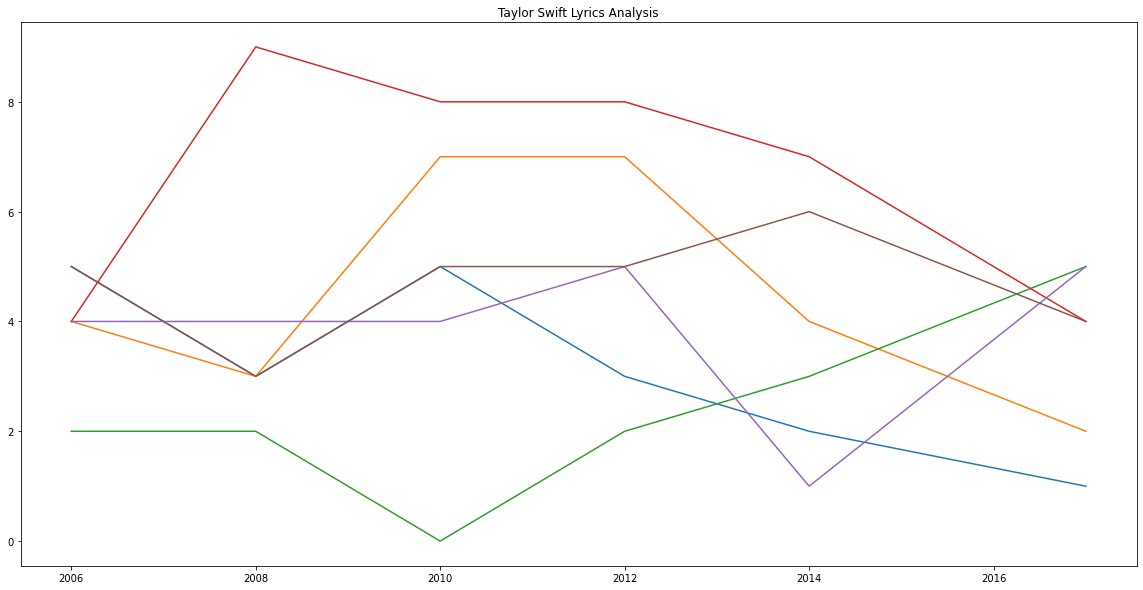

In [50]:
plt.figure(figsize=(20,10))
plt.title("Taylor Swift Lyrics Analysis")
plt.plot(year_topics['year'],year_topics['love'],label = 'love')
plt.plot(year_topics['year'],year_topics['memories'],label = 'memories')
plt.plot(year_topics['year'],year_topics['breakups'],label = 'breakups')
plt.plot(year_topics['year'],year_topics['party'],label = 'party')
plt.plot(year_topics['year'],year_topics['homesick'],label = 'homesick')
plt.plot(year_topics['year'],year_topics['independence'],label = 'independence')
plt.legend